# Guía para el Análisis Descriptivo de los índices

## 1. Visión general del dataset

**Objetivo**: entender qué tipo de información tienes y su calidad.
* Tabla de estructura: número de filas, columnas, tipos de datos (df.info())
* Conteo de valores nulos por Pilar e índice (usar formato horizontal)
* Comparación del total de índice usados con los disponibles
* Calcular índice global según: País, Bloque y Org.
* Comparar año menor, con más actual.
* Ver evolución de los países, bloque y org.

## 2. Análisis univariado (por variable)

**Objetivo**: entender la forma de la distribución y la dispersión.
Numéricas:
* Estadísticas descriptivas (media, mediana, desviación, mínimo, máximo, cuartiles). → df.describe() (agrupar por índice)
* Estadísticas descriptivas (media, mediana, desviación, mínimo, máximo, cuartiles). → df.describe() (agrupar por país/bloque/org)

* Histograma: distribución y sesgo.
* Boxplot: detectar outliers.
* Violin plot: alternativa más rica visualmente.
* Density plot (KDE): suaviza la distribución.
Categóricas:
* Frecuencia absoluta y relativa de categorías.
* Bar chart (barras): categorías vs frecuencia.
* Pie chart (solo si hay pocas categorías).

## 3. Análisis bivariado

**Objetivo**: detectar relaciones lineales, agrupaciones o patrones.
Numérica vs numérica
* Hacer Biplot de un año
* Hacer Biplot

3.1 Categórica vs numérica

**Objetivo**: observar diferencias de comportamiento entre grupos.
* Boxplot o Violin plot: comparar la distribución numérica entre categorías.
* Bar chart con agregaciones (mean, median).

3.2 Categórica vs categórica

**Objetivo**: encontrar asociaciones o desequilibrios entre categorías.
* Tabla de contingencia (cross-tab).
* Gráfico de barras apiladas o agrupadas.
* Heatmap de frecuencias.

##4. Análisis temporal (si hay variable de tiempo)

**Objetivo**: ver tendencias, estacionalidad, picos o caídas.
* Serie temporal (line plot).
* Gráfico de tendencia por período (día, mes, año).
* Descomposición estacional (si aplica).


##5. Análisis geográfico (si hay variables espaciales)

**Objetivo**: visualizar distribución espacial o concentración geográfica.
* Mapas coropléticos (coloreados por intensidad).

##6. Calidad y completitud de los datos

**Objetivo**: priorizar limpieza o imputación.
* Heatmap de valores faltantes (Seaborn o missingno).
* Conteo y porcentaje de nulos.
* Gráfico de barras de missing values por columna.

##7. Resúmenes automáticos útiles
Perfilado automático con librerías como:
* pandas-profiling (ahora ydata-profiling)
* sweetviz
* dtale
* autoviz

# Inicio Código

## Análisis Descriptivo

In [1]:
# Análisis Descriptivo

from google.colab import drive,auth

import gspread
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

sns.set_theme(style="dark")
sns.set_palette("Dark2")

# Fonts
import matplotlib.font_manager as fm
import matplotlib
if not os.path.exists('arial.ttf'):
  !wget https://github.com/Arustico/fonts/raw/main/arial.ttf
fm.fontManager.addfont('arial.ttf')
matplotlib.rc('font', family='arial')


auth.authenticate_user()
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/Magister - TFM')

os.listdir("./")

--2025-12-10 01:30:23--  https://github.com/Arustico/fonts/raw/main/arial.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Arustico/fonts/main/arial.ttf [following]
--2025-12-10 01:30:23--  https://raw.githubusercontent.com/Arustico/fonts/main/arial.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 717428 (701K) [application/octet-stream]
Saving to: ‘arial.ttf’

arial.ttf           100%[===================>] 700.61K  --.-KB/s    in 0.03s   

2025-12-10 01:30:24 (22.0 MB/s) - ‘arial.ttf’ saved [717428/717428]

Mounted at /content/drive


['Lista de países.docx',
 '1. Escrito Tesis',
 '2. Datos',
 '3. Datos Tratados',
 '4. Informes de competitividad',
 '5. scritps',
 'Descripción del índice de competitividad y cambios en 2020.docx',
 'diccionario_indices.gsheet',
 'arial.ttf',
 '6. Articulos Científicos',
 'Notas TFM.gdoc']

### Funciones

In [2]:
# Funciones
import unicodedata
import re
def normalizar_data(values:pd.Series)->pd.Series:
  values = values[~values.isna()].copy()
  wpi = values.min()
  frontera = values.max()
  return (values-wpi)/(frontera-wpi) * 100

def normalizar_text(texto):
  texto = str(texto)
  # Quitar acentos
  texto = ''.join(
    c for c in unicodedata.normalize('NFD', texto)
    if unicodedata.category(c) != 'Mn'
  )
  # Todo minúsculas
  texto = texto.lower()
  # eliminar puntuación, comas, asteriscos, etc.
  texto = re.sub(r'[^a-z0-9\s]', '', texto)
  # eliminar espacios múltiples
  texto = re.sub(r'\s+', ' ', texto).strip()
  return texto

FIG_FOLDER = "./1. Escrito Tesis/figuras/"
TABLE_FOLDER = "./1. Escrito Tesis/tablas/"
def savefig(fig,name,folder=FIG_FOLDER):
  if not os.path.exists(folder):
    os.makedirs(folder)
  pathtosave = os.path.join(folder,name + ".png")
  fig.savefig(pathtosave,dpi=300,bbox_inches='tight')
  print(f"Figura guardada en: {pathtosave}")

def savetableview(df,name,folder=TABLE_FOLDER):
  if not os.path.exists(folder):
    os.makedirs(folder)
  pathtosave = os.path.join(folder,name + ".xlsx")
  df.to_excel(pathtosave,index=False)
  print(f"Tabla guardada en: {pathtosave}")



import plotly.express as px
import plotly.graph_objects as go

def crear_biplot_interactivo(HJ, groups=None, text_label=None,
                             axis_x=0, axis_y=1, arrow_color='gray',
                             arrow_head=2, marker_size=12, title=None):

  # --- Datos base ---
  X = HJ.X
  ind = HJ.row_coordinates.reset_index() # corresponden a los individuos
  vec = HJ.column_coordinates.copy() # corresponden a los vectores

  # --- Nombres de ejes ---
  axis1_name = f'Axis {axis_x + 1} ({HJ.explained_variance[axis_x]:.2f}%)'
  axis2_name = f'Axis {axis_y + 1} ({HJ.explained_variance[axis_y]:.2f}%)'
  ind[axis1_name] = ind[f'Axis {axis_x + 1}']
  ind[axis2_name] = ind[f'Axis {axis_y + 1}']

  # --- Gráfico de individuos ---
  fig = px.scatter(
    ind, x=axis1_name, y=axis2_name,
    color=groups, text=text_label,
    title=title or "Biplot Interactivo"
  )
  fig.update_traces(textposition="bottom right", marker_size=marker_size)

  # --- Añadir autovectores ---
  for i in range(len(vec)):
    fig.add_trace(
    go.Scatter(
      x=[0, vec.iloc[i, axis_x]],
      y=[0, vec.iloc[i, axis_y]],
      mode='lines+text',
      line=dict(color=arrow_color, width=2),
      marker=dict(size=20,symbol="arrow-bar-up", angleref="previous",color="black"),
      text=[None, vec.index[i]],
      textposition="top center",
      showlegend=False,
      name=vec.index[i],
      hoverinfo='text',
      hovertext=f"{vec.index[i]}"
    ))

  # --- Layout base ---
  fig.update_layout(
    xaxis_title=axis1_name,
    yaxis_title=axis2_name,
    template="plotly_white",
    title_x=0.5
  )
  return fig, vec



def agregar_filtros_biplot(fig, vec, filter_cols=list,num_previous_filters=3):

  n_vectores = len(vec)
  # muestra los elementos (false no los muestra)
  base_visibility = [True] + [True] * n_vectores  # puntos + vectores

  dropdowns = []
  x_pos = 0.15

  for filtro in filter_cols:
    if filtro not in vec.columns:
      print("Error filtro, no existe columna")
      return None
    # valores únicos del filtro
    valores = sorted(vec[filtro].dropna().unique())
    buttons = [
      dict(
        label=f"{filtro}: Todos",
        method="update",
        args=[{"visible": base_visibility}]
      )
    ]
    for val in valores:
      visible_mask = num_previous_filters * [True] + vec[filtro].eq(val).tolist()
      buttons.append(
          dict(
          label=str(val),
          method="update",
          args=[{"visible": visible_mask}]
      ))
    #return val,visible_mask

    dropdowns.append(dict(
      buttons=buttons,
      direction="down",
      showactive=True,
      x=x_pos,
      y=1.15,
      xanchor="left",
      yanchor="top",
      pad={"r": 10, "t": 10},
      active=0,
      name=filtro.capitalize()
    ))

    x_pos += 0.15  # separar menús visualmente

  fig.update_layout(
    updatemenus=dropdowns,
    margin=dict(t=100)
  )

  return fig


In [ ]:
!ls

'1. Escrito Tesis'
'2. Datos'
'3. Datos Tratados'
'4. Informes de competitividad'
'5. scritps'
'6. Articulos Científicos'
 arial.ttf
'Descripción del índice de competitividad y cambios en 2020.docx'
 diccionario_indices.gsheet
'Lista de países.docx'
'Notas TFM.gdoc'


In [3]:
# Lectura datos: Se leen ambos formatos
data_indicadores = pd.read_excel("./3. Datos Tratados/bd_indices_wef.xlsx")
data_indicadores['VALOR_INDICE'] = pd.to_numeric(data_indicadores['VALOR_INDICE'], errors='coerce')

indicadores_info = pd.read_excel("./2. Datos/bd_diccionario_indices.xlsx")

# Normalización: Se usará método 4.0 y su método de normalización sencillo 0-100
data_indicadores['VALOR_INDICE_NORM'] = data_indicadores.groupby(["AÑO","NUM_INDX"])['VALOR_INDICE'].transform(lambda x: normalizar_data(x))

data_indicadores.groupby(['PAIS_COD','NOMBRE']).size().reset_index()
data_indicadores.keys()
data_indicadores.apply(lambda x: f"{x['PILAR']}.{x['DESCRIPCION_PILAR']}",axis=1).unique()

array(['1.Instituciones', '2.Infraestructura',
       '3.Adopción de Tecnologías de Información y Comunicación (TIC)',
       '4.Estabilidad Macroeconómica', '5.Salud', '6.Habilidades',
       '7.Mercado de Productos', '8.Mercado Laboral',
       '9.Sistema Financiero', '10.Tamaño del Mercado',
       '11.Dinamismo Empresarial', '12.Capacidad de Innovación'],
      dtype=object)

In [ ]:
display(data_indicadores.keys())
display(indicadores_info.keys())

Index(['PAIS_COD', 'PERIODO', 'NUM_INDX', 'VALOR_INDICE', 'AÑO', 'NOMBRE',
       'ORG', 'BLOCK', 'DESCRIPCION_INDX', 'DESCRIPCION_INDX_NORM', 'PILAR',
       'SUBPILAR', 'DESCRIPCION_PILAR', 'CATEGORIA_INDX', 'CATEGORIA_DESC',
       'FACTOR'],
      dtype='object')

Index(['NUM_INDX', 'DESCRIPCION_INDX', 'DESCRIPCION_INDX_NORM', 'PILAR',
       'SUBPILAR', 'DESCRIPCION_PILAR', 'AÑO', 'CATEGORIA_INDX',
       'CATEGORIA_DESC', 'FACTOR'],
      dtype='object')

/tmp/ipython-input-2447294239.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(range(0,7))


Figura guardada en: ./1. Escrito Tesis/figuras/hist_indicadores_por_año.png


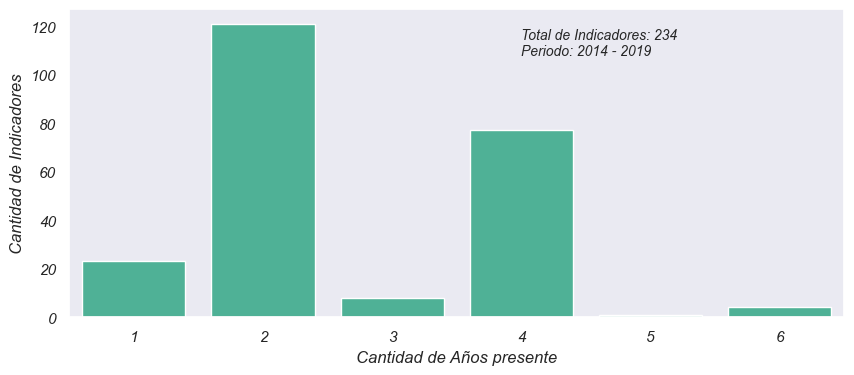

In [86]:
# Indicadores presentes en todo el periodo
# Total de indicadores (normalizados) en el periodo 2014 - 2019
display(f"Total de Indicadores en todo el periodo: {data_indicadores['DESCRIPCION_INDX_NORM'].nunique()}")

# Años unicos
unique_years = data_indicadores['AÑO'].unique()
num_unique_years = len(unique_years)
display(f"Años: {unique_years}")
colindexname = "DESCRIPCION_INDX_NORM"

# Group by 'DESCRIPCION_INDX' and count the number of unique years for each description
description_year_counts = data_indicadores.groupby(colindexname)['AÑO'].nunique().reset_index()
description_year_counts["INDX"] = description_year_counts.index.tolist()

# Histograma de cantidad de años de presencia de indicadores en el periodo 2014-2019
fig,ax = pl.subplots(figsize=(10,4))
sns.histplot(data=description_year_counts,x="AÑO",ax=ax,discrete=True,shrink=0.8)
ax.set_xlabel("Cantidad de Años presente")
ax.set_ylabel("Cantidad de Indicadores")
ax.set_xlim(0,6.5)
ax.text(4,108,f"Total de Indicadores: {data_indicadores['DESCRIPCION_INDX_NORM'].nunique()}\nPeriodo: 2014 - 2019",fontdict={'fontsize':10})
ax.set_xlim(0.5,6.5)
ax.set_xticklabels(range(0,7))
fig.show()
savefig(fig,"hist_indicadores_por_año")


# Vista de indeicadores presentes en todo los años
descriptions_in_all_years = description_year_counts[
    description_year_counts['AÑO'] >= num_unique_years - 1]
descriptions_in_all_years = descriptions_in_all_years.drop(columns=["AÑO","INDX"])
# merge con info de indicadores
usedcols = ['DESCRIPCION_INDX_NORM', 'NUM_INDX','PILAR','SUBPILAR', 'DESCRIPCION_PILAR', 'AÑO', 'CATEGORIA_INDX']
descriptions_in_all_years = descriptions_in_all_years.merge(indicadores_info[usedcols],on="DESCRIPCION_INDX_NORM",how="left")
# Arreglo para visualizarlos enlistando los valores distintos para cada indicador.
descriptions_in_all_years = descriptions_in_all_years.groupby("DESCRIPCION_INDX_NORM").agg(lambda x: sorted(list(set(x)))).reset_index()
display(descriptions_in_all_years)

savetableview(descriptions_in_all_years,"indicadores_en_todo_el_periodo")

# Cantidad de indicadores, datos faltantes y paises por año
display(f"Total de pilares en todo el periodo {data_indicadores['DESCRIPCION_PILAR'].nunique()}") #
display(f"Total de paises en todo el periodo {data_indicadores['PAIS_COD'].nunique()}") #

nullsize = lambda x: len(np.array(x)[np.isnan(x)])
resumdata = data_indicadores.groupby('AÑO').agg(
    num_indx = ('DESCRIPCION_INDX_NORM',pd.Series.nunique),
    num_miss_dato = ('VALOR_INDICE',nullsize),
    num_tot_datos = ('VALOR_INDICE',len)
    #{'DESCRIPCION_INDX_NORM':'nunique', 'VALOR_INDICE':nullsize}
    ).reset_index()
resumdata = resumdata.rename(columns={"num_indx":"N° DE INDICADORES","num_miss_dato":"N° DE DATOS FALTANTES","num_tot_datos":"Total Datos"})
resumdata["% Datos Faltantes"] = resumdata["N° DE DATOS FALTANTES"]*100/resumdata["Total Datos"]
resumdata["% Datos Faltantes"] = resumdata["% Datos Faltantes"].round(1)
display(resumdata)
savetableview(resumdata,"resumendata")

In [ ]:
data_indicadores['NOMBRE']

,NOMBRE
0,Australia
1,Austria
2,Belgium
3,Brasil
4,Bulgaria
...,...
35051,Saudi Arabia
35052,Senegal
35053,Vietnam
35054,South Africa


Figura guardada en: ./1. Escrito Tesis/figuras/missing_values_pais.png


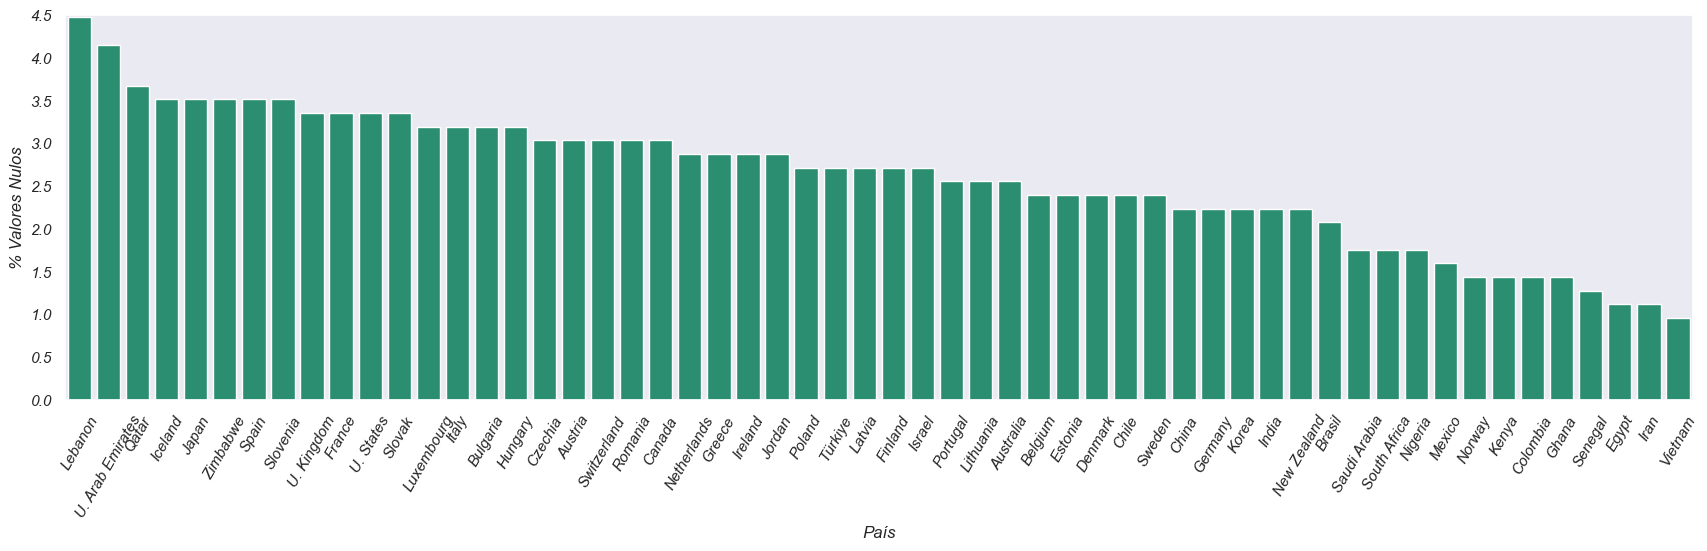

In [ ]:

# Nulos c/r a País
missing_values_pais = []
for pilar,aux in data_indicadores.groupby('NOMBRE'):
  missing_values = aux['VALOR_INDICE'].isnull().sum()
  per_missing_values = missing_values*100 / len(aux)
  missing_values_pais.append([pilar,missing_values, per_missing_values])

missing_values_pais = pd.DataFrame(missing_values_pais,columns=['NOMBRE','Missing Values', "% Missing Values"])
missing_values_pais = missing_values_pais.sort_values(by=['Missing Values'], ascending=False)

fig,ax = pl.subplots(figsize=(21,5))
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

sns.barplot(y="% Missing Values",x="NOMBRE",data=missing_values_pais,ax=ax)
ax.set_ylim(0,4.5)
ax.set_ylabel("% Valores Nulos")
ax.set_xlabel("País")
xlabels = [x.set_rotation(60) for x in ax.get_xticklabels()]
savefig(fig,"missing_values_pais")
fig.show()


/usr/local/lib/python3.12/dist-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


Figura guardada en: ./1. Escrito Tesis/figuras/hist_indicadores_por_año_porcentaje.png


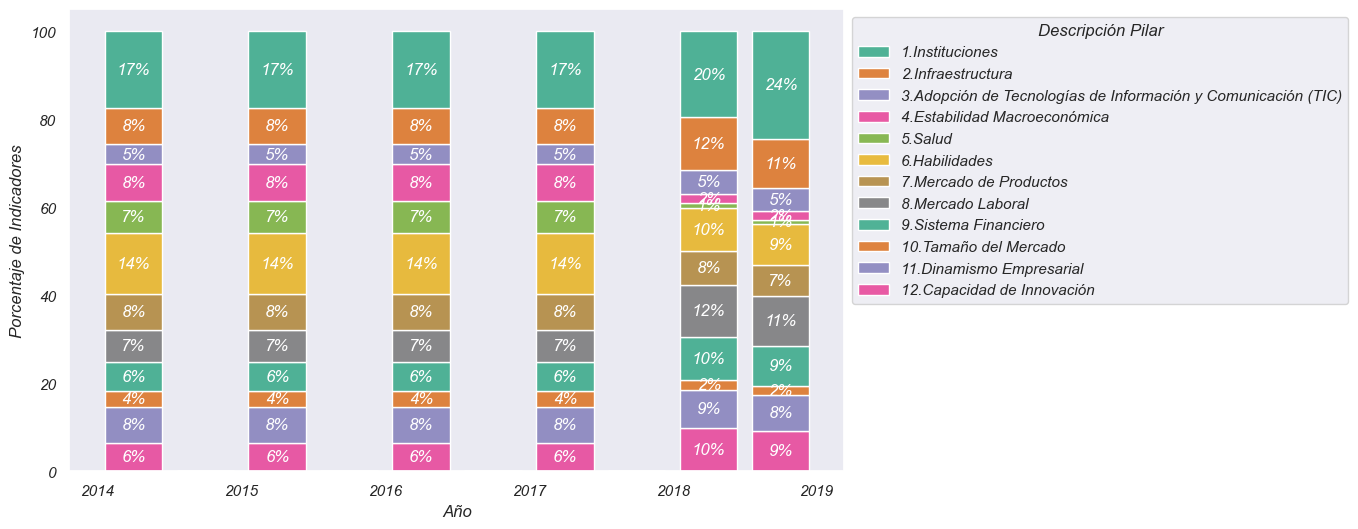

In [55]:
# Cantidad de índices por pilar y año
aux = data_indicadores.groupby(["AÑO","PILAR","DESCRIPCION_PILAR"])['DESCRIPCION_INDX_NORM'].nunique().reset_index()
#display(aux.T)
# total de índices por año.
total_indices_per_year = aux.groupby('AÑO')['DESCRIPCION_INDX_NORM'].transform('sum')
# porcentaje que representan
aux['percentage'] = aux['DESCRIPCION_INDX_NORM'] / total_indices_per_year * 100
aux['DESCRIPCION_PILAR_STR'] = aux.apply(lambda x: str(x['PILAR'])+"."+x['DESCRIPCION_PILAR'],axis=1)

fig,ax = pl.subplots(figsize=(10,6))
sns.histplot(aux, x='AÑO', hue='DESCRIPCION_PILAR_STR', weights='percentage',
             multiple='stack', shrink=0.8, ax=ax,palette="Dark2")
for c in ax.containers:
  labels = [f"{int(np.round(v.get_height(),0))}%" if v.get_height()>0 else '' for v in c]
  ax.bar_label(c, labels=labels, label_type='center',color="white")

ax.set_ylabel('Porcentaje de Indicadores')
ax.set_xlabel('Año')
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
legend.set_title("Descripción Pilar")
savefig(fig,"hist_indicadores_por_año_porcentaje")



,PAIS_COD,PILAR,BLOCK,ORG,AÑO,VALOR_INDICE_NORM
0,ARE,1,Asia,BRICS,2014,83.514972
1,ARE,1,Asia,BRICS,2015,80.620089
2,ARE,1,Asia,BRICS,2016,86.070420
3,ARE,1,Asia,BRICS,2017,83.462505
4,ARE,1,Asia,BRICS,2018,68.865699
...,...,...,...,...,...,...
4027,ZWE,12,Africa,OTRO,2015,4.936088
4028,ZWE,12,Africa,OTRO,2016,3.574611
4029,ZWE,12,Africa,OTRO,2017,1.132117
4030,ZWE,12,Africa,OTRO,2018,6.542856


Figura guardada en: ./1. Escrito Tesis/figuras/global_ind_por_org.png
Figura guardada en: ./1. Escrito Tesis/figuras/global_ind_por_block.png


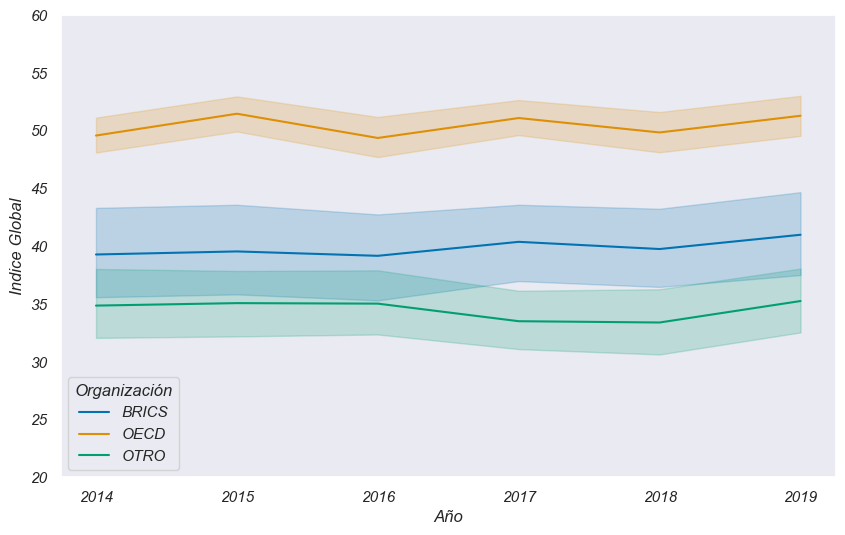

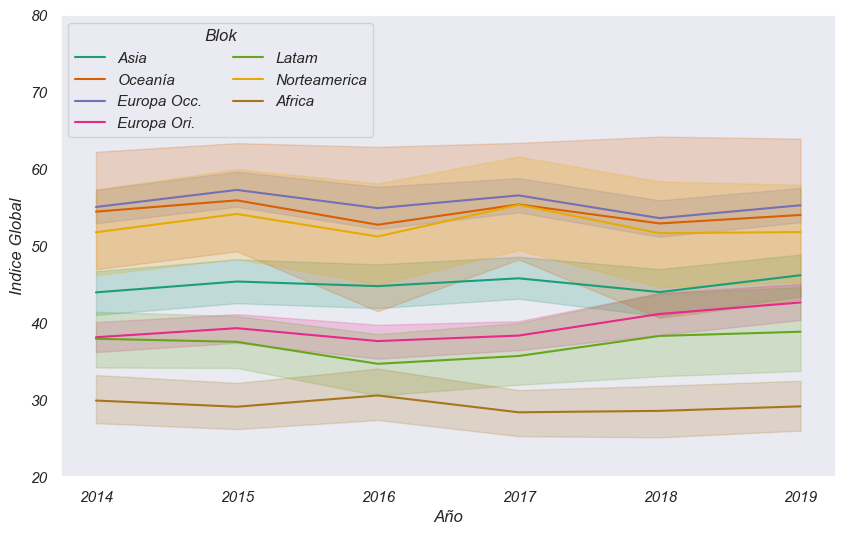

In [ ]:
# Cálculo de indice global según fórmula

global_ind_df = data_indicadores.groupby(["PAIS_COD","PILAR",'BLOCK','ORG',"AÑO"]).agg({"VALOR_INDICE_NORM":"mean"}).reset_index()
display(global_ind_df)

fig,ax = pl.subplots(figsize=(10,6))
sns.lineplot(x="AÑO",y="VALOR_INDICE_NORM",data=global_ind_df,hue="ORG",ax=ax,palette="colorblind")
ax.legend(title="Organización")
ax.set_ylabel("Indice Global")
ax.set_xlabel("Año")
ax.set_ylim(20,60)
savefig(fig,"global_ind_por_org")
#

fig,ax = pl.subplots(figsize=(10,6))
sns.lineplot(x="AÑO",y="VALOR_INDICE_NORM",data=global_ind_df,hue="BLOCK",palette="Dark2")
ax.legend(title="Blok",ncol=2)
ax.set_ylabel("Indice Global")
ax.set_xlabel("Año")
ax.set_ylim(20,80)
savefig(fig,"global_ind_por_block")


Figura guardada en: ./1. Escrito Tesis/figuras/evolucion_pilares_2014-2019.png


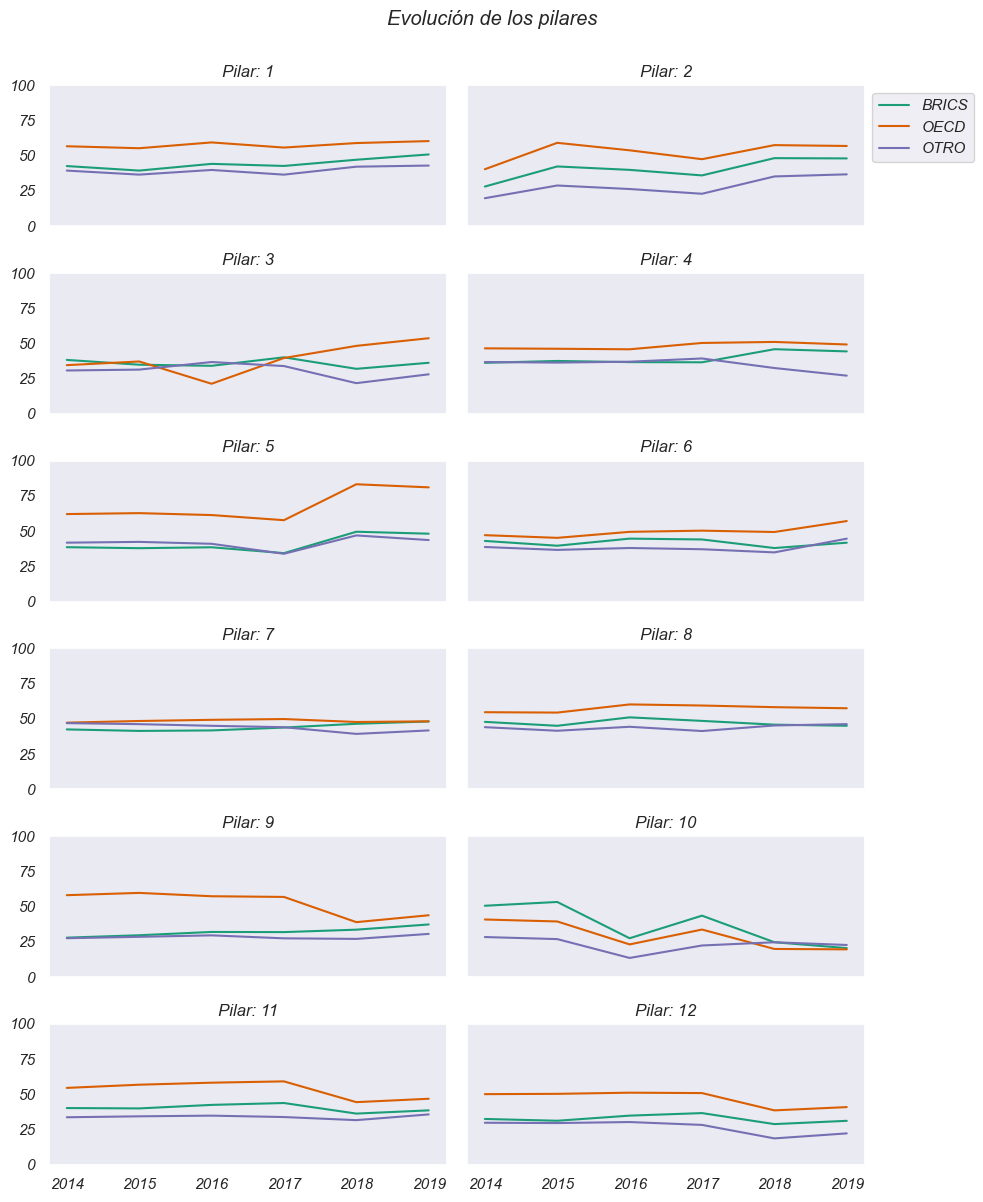

In [ ]:
# timeline por pilar
from matplotlib.lines import Line2D
aux = data_indicadores.pivot_table(index=["ORG","AÑO"],columns="PILAR",values="VALOR_INDICE_NORM")
aux = aux.reset_index()

fig,axlist = pl.subplots(6,2,figsize=(10,12))
colpairlist = np.array([col for col in aux.keys() if col not in ["ORG","AÑO"]])
colpairlist = colpairlist.reshape(-1,2)
k=0
colpairlist

for col,ax in zip(colpairlist,axlist):
  sns.lineplot(data=aux,ax=ax[0],x="AÑO",y=col[0],hue="ORG",legend=False)
  sns.lineplot(data=aux,ax=ax[1],x="AÑO",y=col[1],hue="ORG",legend=False)
  ax[0].set_title(f"Pilar: {col[0]}")
  ax[1].set_title(f"Pilar: {col[1]}")
  ax[1].set_yticks([])
  for ax2 in ax:
    ax2.set_xlabel("")
    ax2.set_ylabel("")
    ax2.set_ylim(0,100)
  if col[0]<11:
    for ax2 in ax:
      ax2.set_xticks([])
#axlist[0][1].legend(loc='upper center',labels=aux["ORG"].unique(),ncol=1)
a  =  axlist[0][1]
for l,n in zip(a.get_lines(),aux["ORG"].unique()):
  l.set_label(n)
a.legend(loc="best",bbox_to_anchor=(1,1))
fig.suptitle("Evolución de los pilares",y=1.0)
fig.tight_layout()
#line = Line2D([0], [0], label='manual line', color='k')
#line = Line2D([0], [0], label='manual line', color='k')

savefig(fig,"evolucion_pilares_2014-2019")

### Analisis de Gauss

Figura guardada en: ./1. Escrito Tesis/figuras/pairplot_hist_pilar.png
Figura guardada en: ./1. Escrito Tesis/figuras/probplot_pilares.png


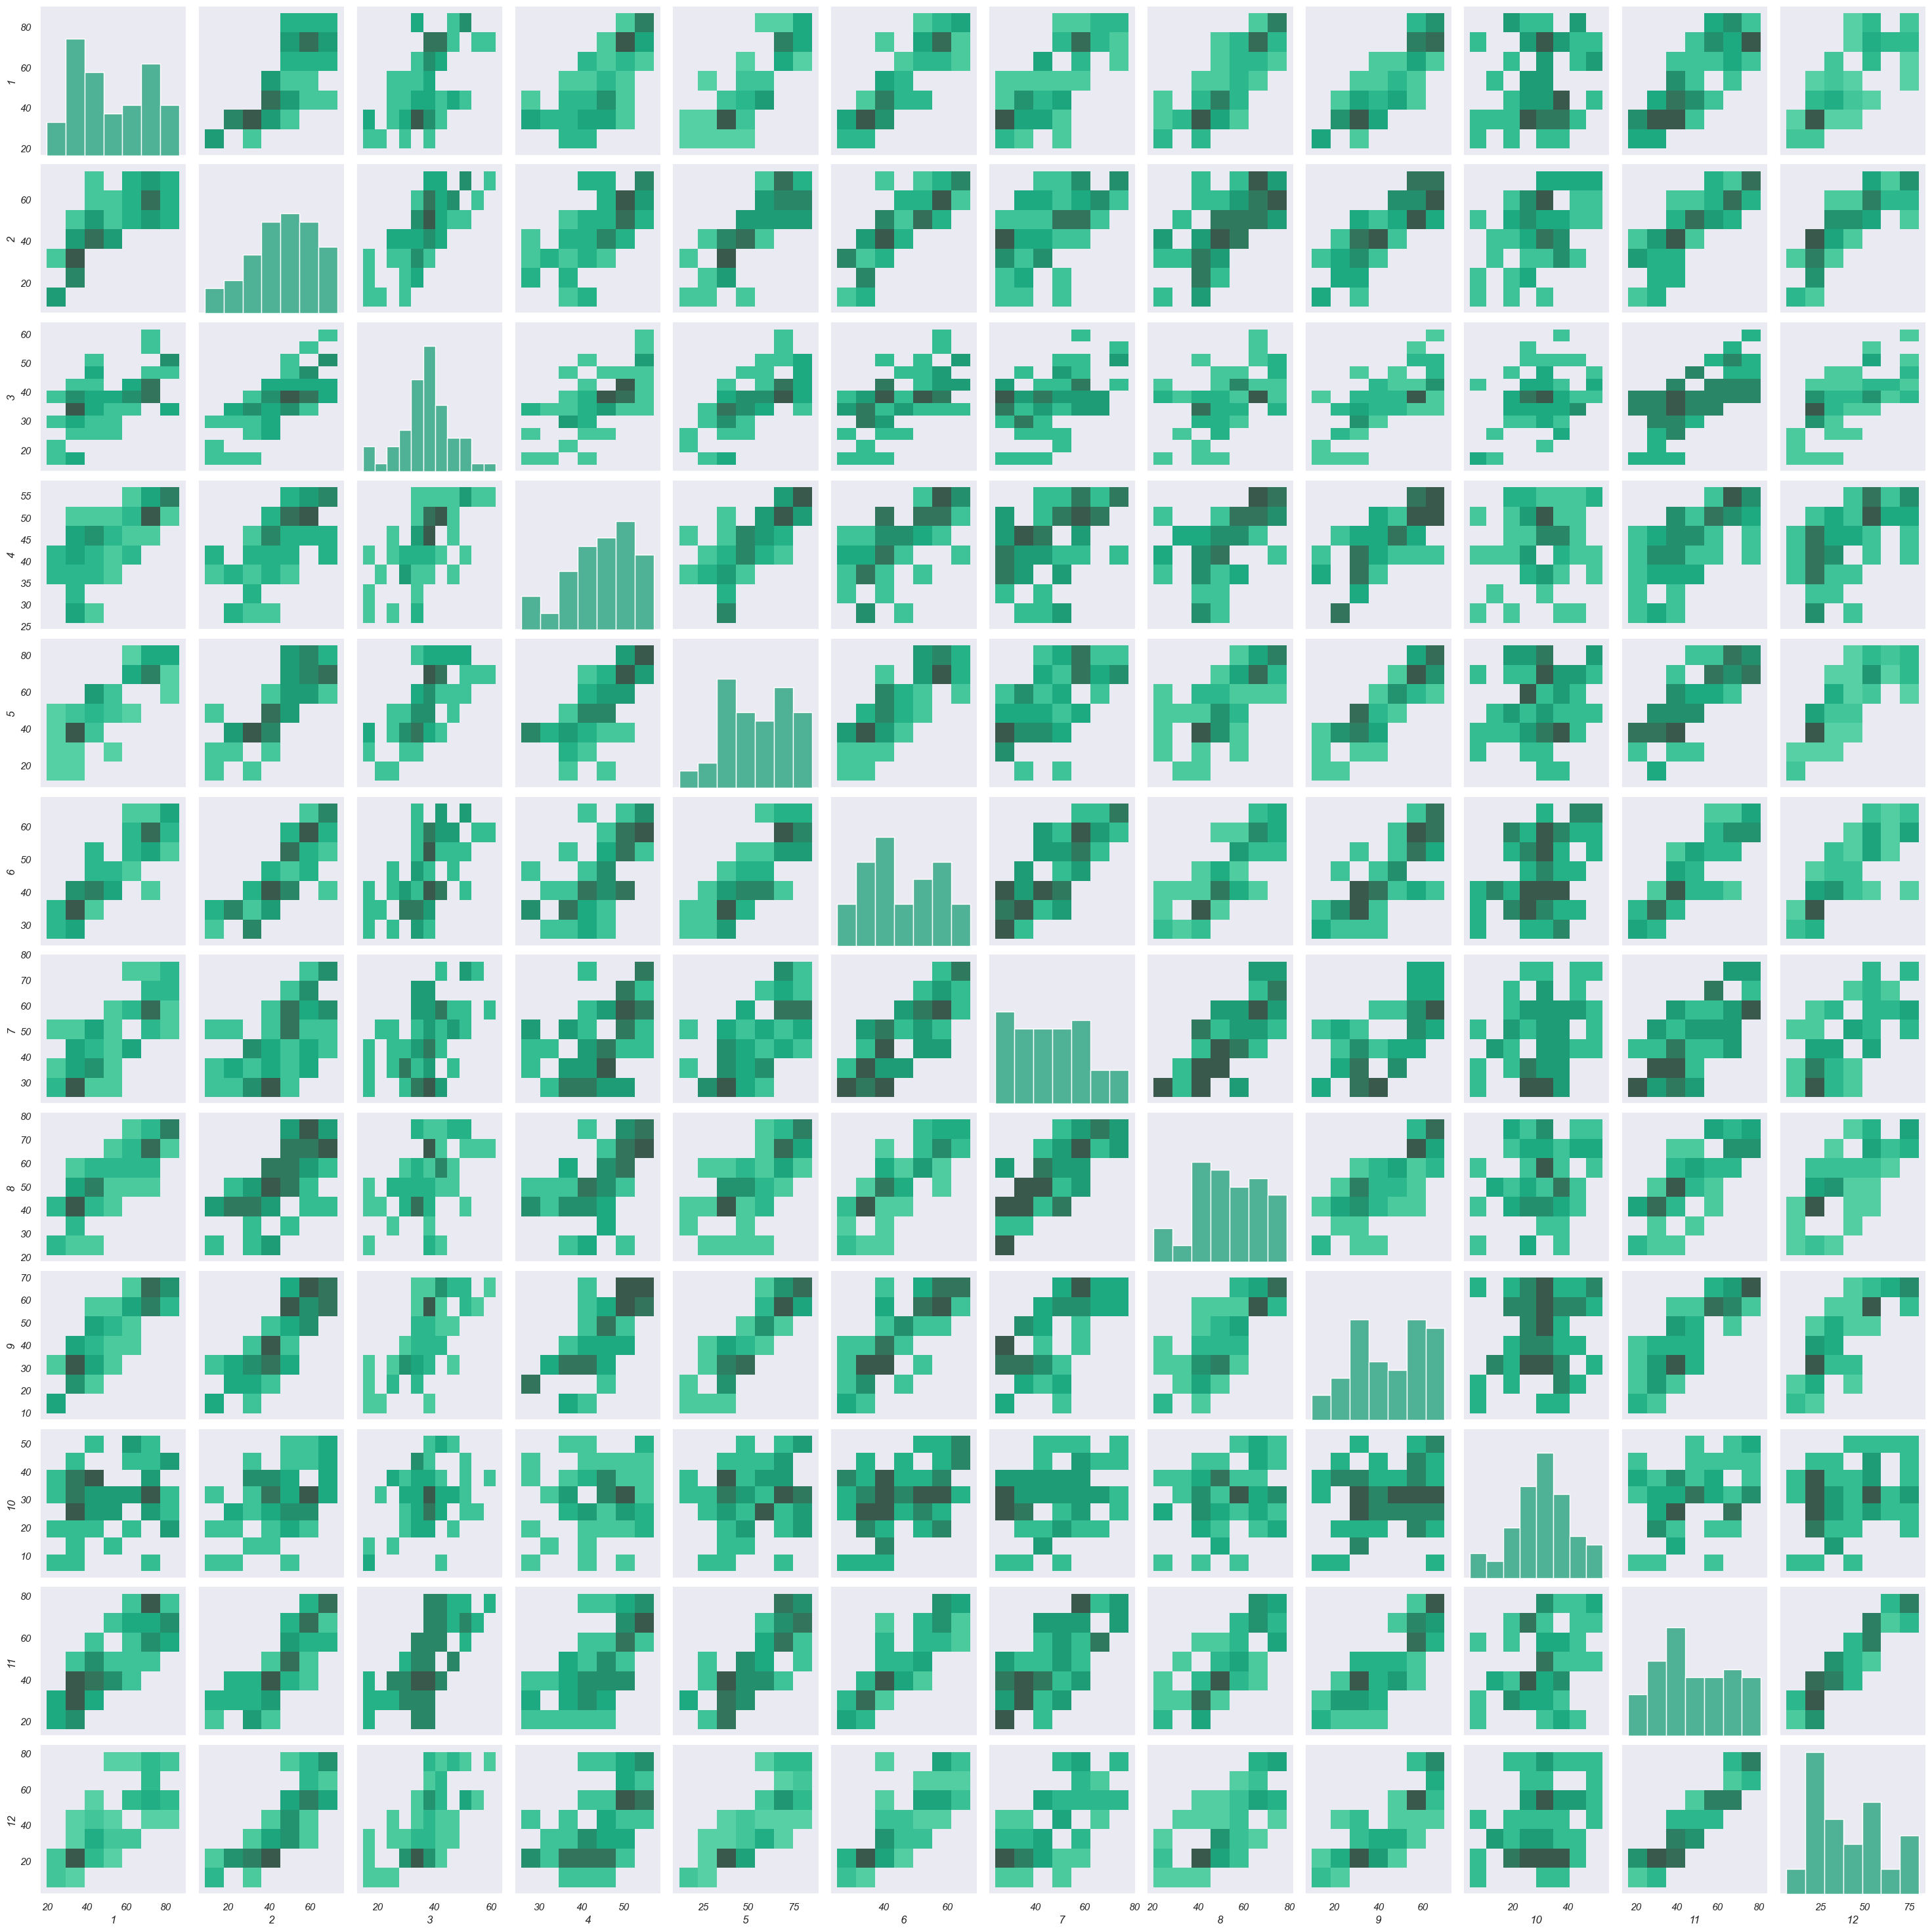

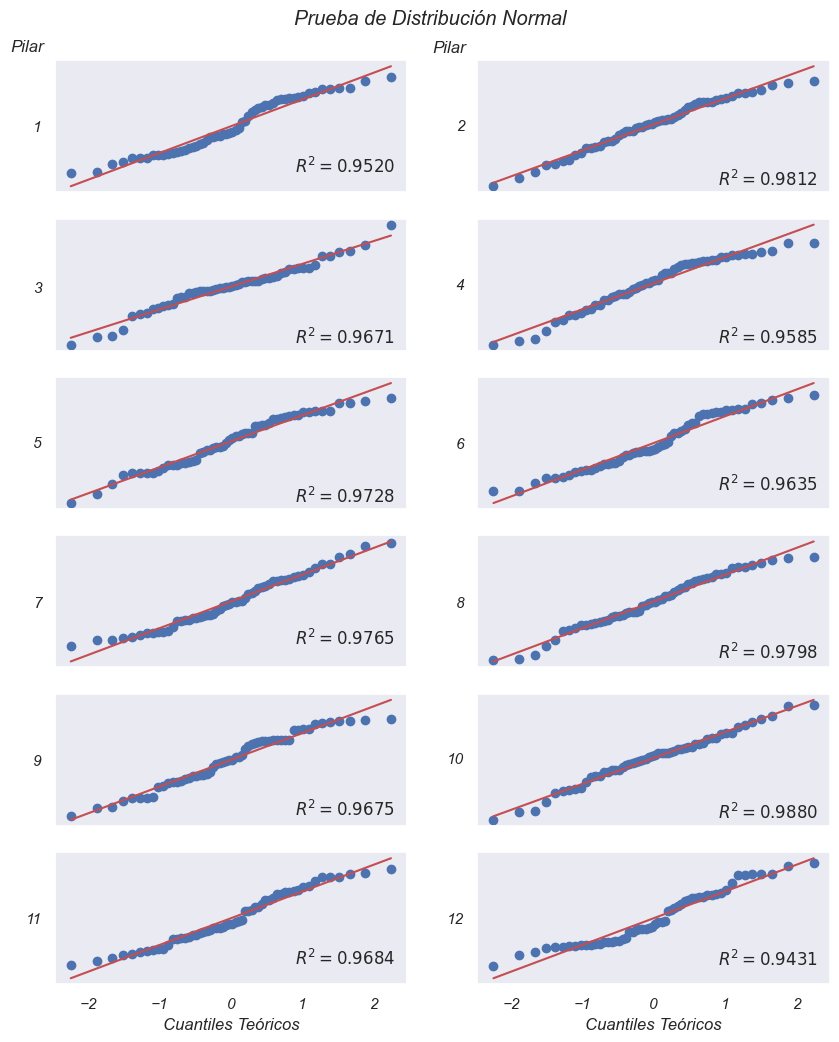

In [56]:
# Análisis de gaus
from scipy.stats import probplot

aux = data_indicadores.pivot_table(index=["PAIS_COD","ORG"],columns="PILAR",values="VALOR_INDICE_NORM")
aux = aux.dropna()
aux = aux.reset_index()
aux = aux.set_index("PAIS_COD")
fig = sns.pairplot(aux,kind='hist')
savefig(fig,"pairplot_hist_pilar")

fig,axlist = pl.subplots(6,2,figsize=(10,12))
colpairlist = np.array([col for col in aux.keys() if col != "ORG"])
colpairlist = colpairlist.reshape(-1,2)
k=0
colpairlist

for col,ax in zip(colpairlist,axlist):
  #print(col[0],ax[0])
  probplot(aux[col[0]].values,plot=ax[0],rvalue=True)
  probplot(aux[col[1]].values,plot=ax[1],rvalue=True)
  if col[0]<11:
    for ax2 in ax:
      ax2.set_xticks([])
  for ax2,col2 in zip(ax,col):
    ax2.set_xlabel("")
    ax2.set_title("")
    ax2.set_ylabel("")
    ax2.set_yticks([aux[col2].mean()],labels=[col2])

fig.suptitle("Prueba de Distribución Normal",va="baseline",y=0.91)
axlist[0][0].text(-3.1,105,"Pilar")
axlist[0][1].text(-3.1,91,"Pilar")
axlist[-1][0].set_xlabel("Cuantiles Teóricos")
axlist[-1][1].set_xlabel("Cuantiles Teóricos")
savefig(fig,"probplot_pilares")



Generating heatmap for year: 2014
Figura guardada en: ./1. Escrito Tesis/figuras/heatmap_correlation_pillars_2014.png


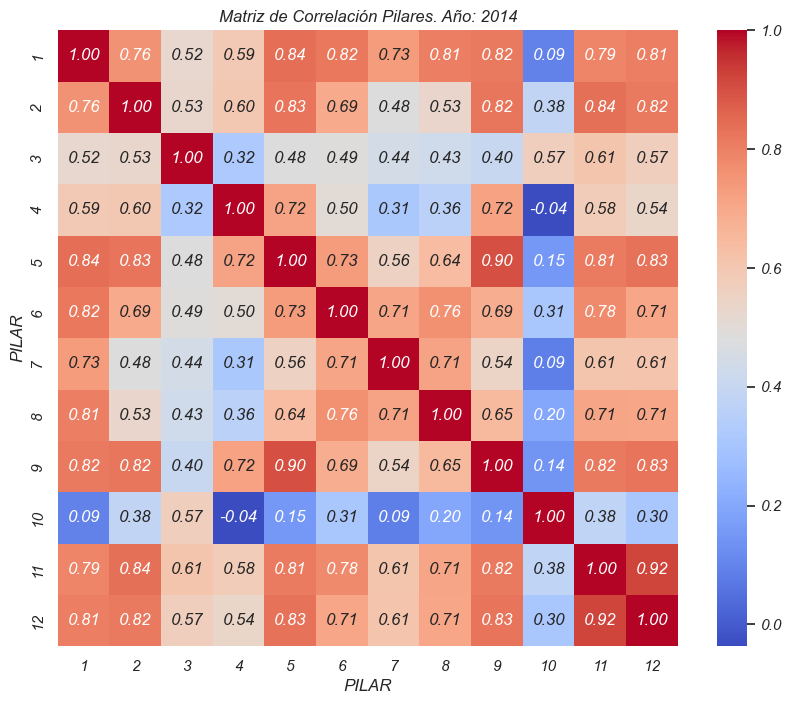

Generating heatmap for year: 2015
Figura guardada en: ./1. Escrito Tesis/figuras/heatmap_correlation_pillars_2015.png


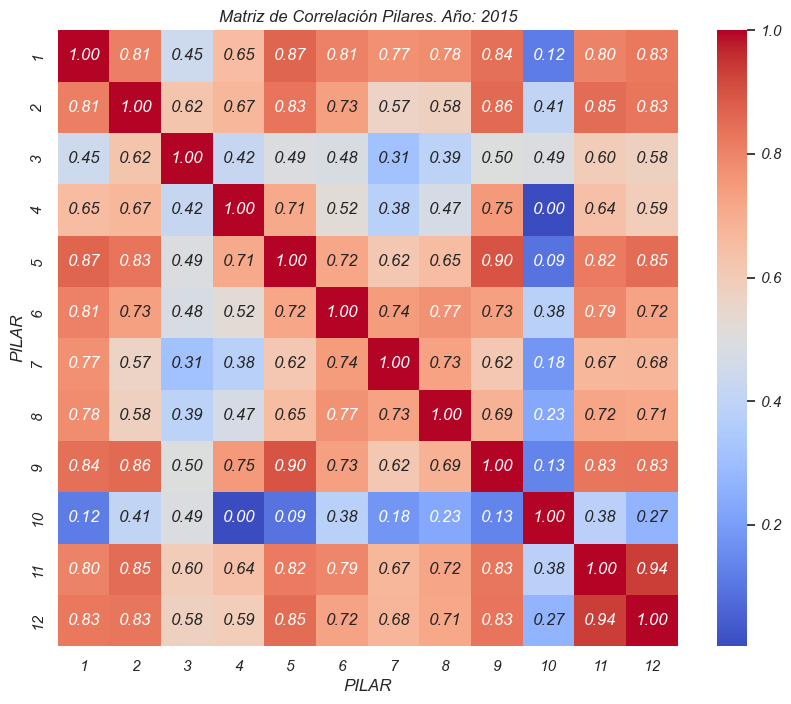

Generating heatmap for year: 2016
Figura guardada en: ./1. Escrito Tesis/figuras/heatmap_correlation_pillars_2016.png


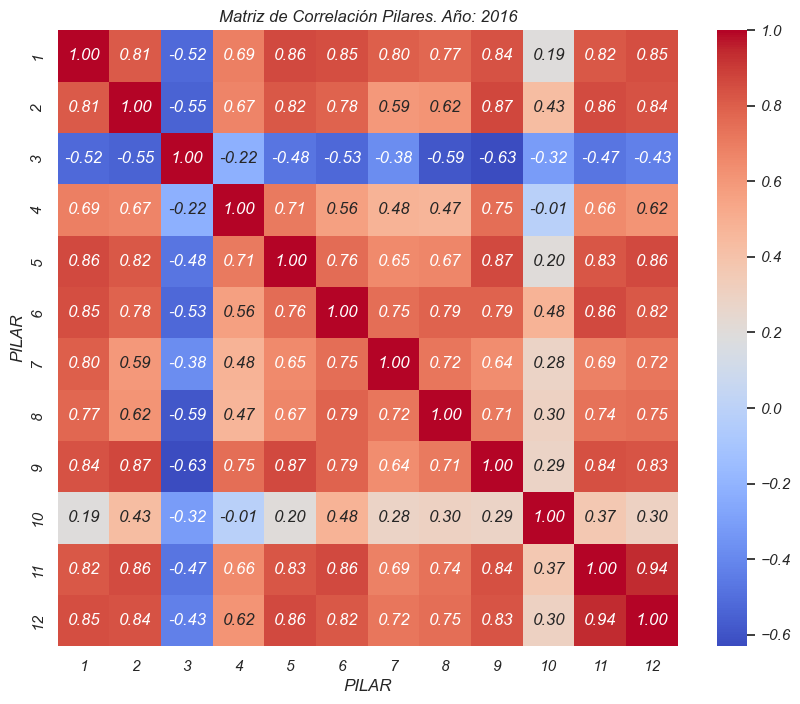

Generating heatmap for year: 2017
Figura guardada en: ./1. Escrito Tesis/figuras/heatmap_correlation_pillars_2017.png


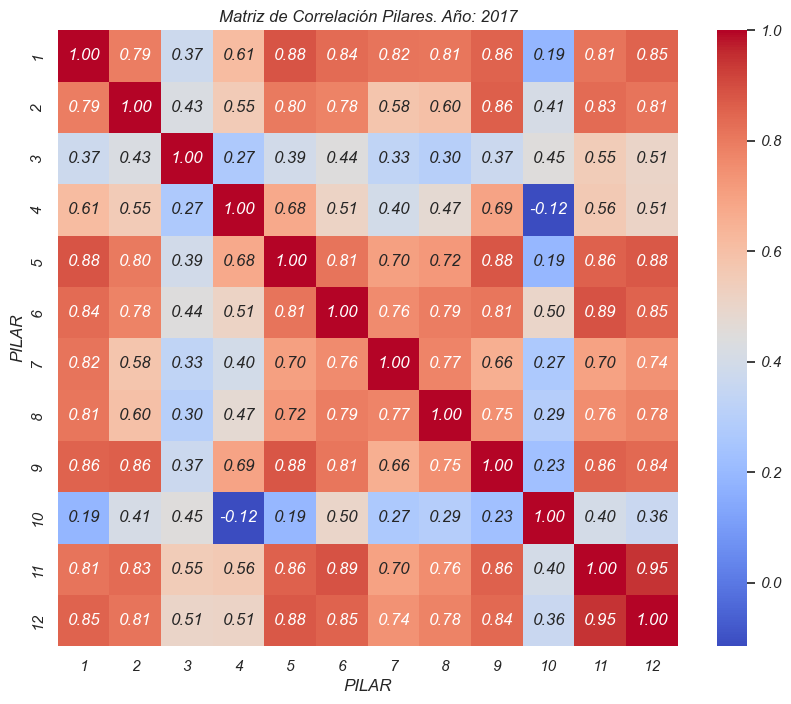

Generating heatmap for year: 2018
Figura guardada en: ./1. Escrito Tesis/figuras/heatmap_correlation_pillars_2018.png


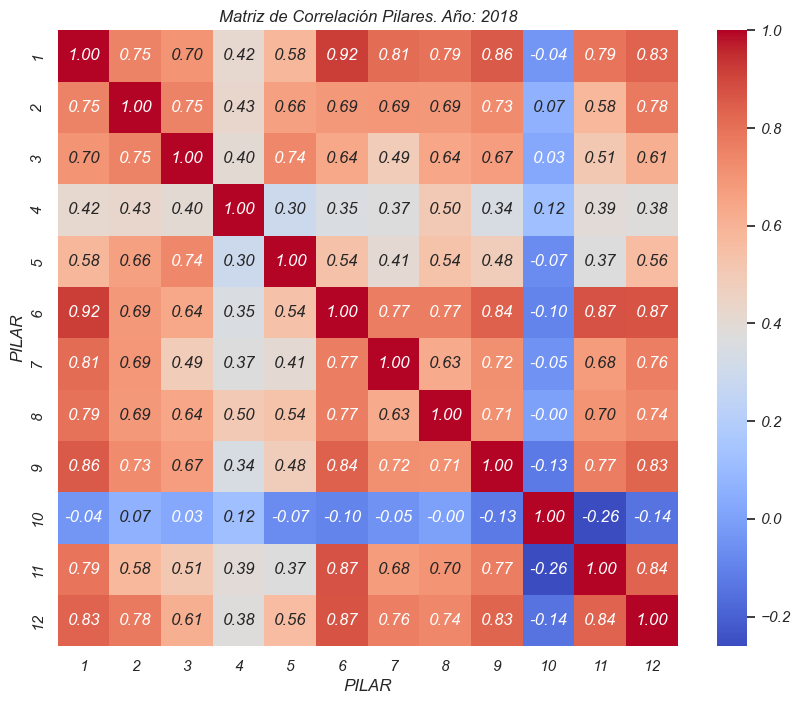

Generating heatmap for year: 2019
Figura guardada en: ./1. Escrito Tesis/figuras/heatmap_correlation_pillars_2019.png


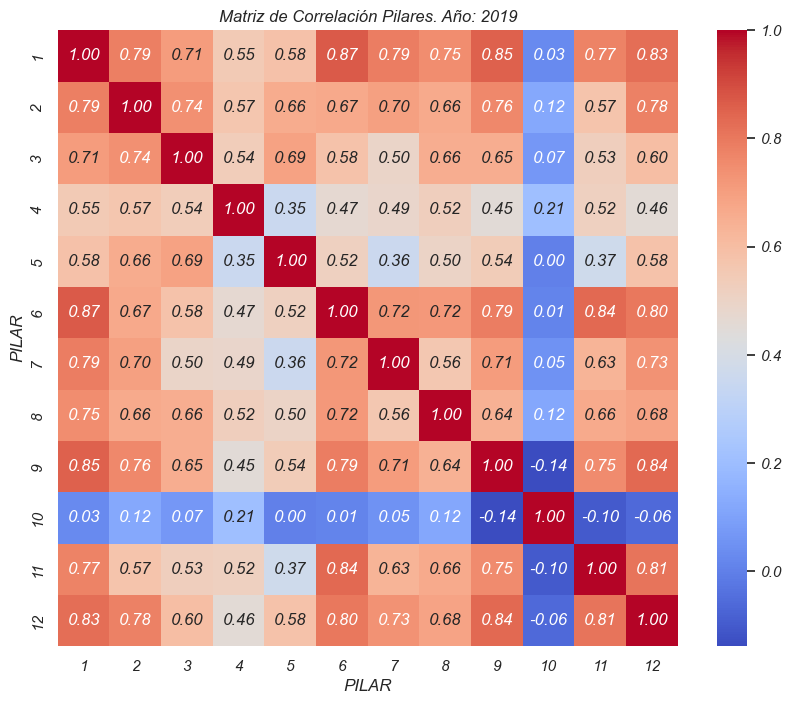

In [59]:
# Matrices de correlaciones

for year in data_indicadores['AÑO'].unique():
  print(f"Generating heatmap for year: {year}")
  # Filter data for the current year and pivot to get pillars as columns
  df_year = data_indicadores[data_indicadores['AÑO'] == year].pivot_table(
    index='PAIS_COD',
    columns='PILAR',
    values='VALOR_INDICE_NORM'
  )
  # Calculate the correlation matrix
  correlation_matrix = df_year.corr()
  # Plot the heatmap
  fig, ax = pl.subplots(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
  ax.set_title(f'Matriz de Correlación Pilares. Año: {year}')
  savefig(fig, f"heatmap_correlation_pillars_{year}")
  pl.show()



Figura guardada en: ./1. Escrito Tesis/figuras/num_pilars_correlated.png


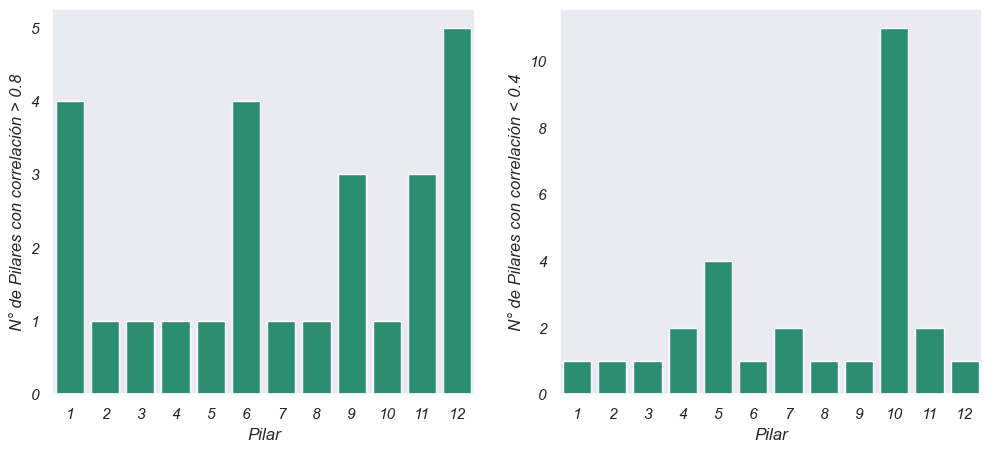

In [ ]:
# ¿Cuantos tienen una correlación sobre +-0.8?
count_pilars_correlated = []
count_pilars_notcorrelated = []
for pilar in correlation_matrix.keys():
  corr_pilars = correlation_matrix[pilar].sort_values(ascending=False)
  notcorr_pilars = corr_pilars[corr_pilars.abs()<0.4].count()
  corr_pilars = corr_pilars[corr_pilars.abs()>0.8].count()
  count_pilars_correlated.append([pilar,corr_pilars,notcorr_pilars])

count_pilars_correlated = pd.DataFrame(count_pilars_correlated,columns=['PILAR','NUM_CORRELATED','NOT_CORRELATED'])

fig,ax=pl.subplots(1,2,figsize=(12,5))
sns.barplot(data=count_pilars_correlated,x="PILAR",y="NUM_CORRELATED",ax=ax[0])
ax[0].set_ylabel("N° de Pilares con correlación > 0.8")
ax[0].set_xlabel("Pilar")

sns.barplot(data=count_pilars_correlated,x="PILAR",y="NOT_CORRELATED",ax=ax[1])
ax[1].set_ylabel("N° de Pilares con correlación < 0.4")
ax[1].set_xlabel("Pilar")
#

savefig(fig,"num_pilars_correlated")
#

### Pivot data

In [ ]:
# Pivote y guardado en forma p1 p2 p3 ... pn por año.
data_pivoted = []
# Tomamos los pilares, y es el promedio simple por año.
for year,df in data_indicadores.groupby('AÑO'):
  df = df.pivot_table(index='PAIS_COD',columns='PILAR',values='VALOR_INDICE_NORM',aggfunc="mean")
  df = df.rename(columns={col:f"{col}-{year}" for col in df.keys()})
  data_pivoted.append(df)

data_pivoted = pd.concat(data_pivoted,axis=1)
display(data_pivoted.head(5))

data_pivoted.to_excel("./3. Datos Tratados/data_pivoted.xlsx")

# Segunda view
data_pivoted_2 = []
for año,df in data_indicadores.groupby("AÑO"):
  df = df.pivot_table(index='PAIS_COD',columns='PILAR',values='VALOR_INDICE_NORM',aggfunc="mean")
  df = df.rename(columns={pilar:f"{pilar}-{año}" for pilar in df.keys()})
  data_pivoted_2.append(df.T)

data_pivoted_2 = pd.concat(data_pivoted_2,axis=0)
data_pivoted_2.to_excel("./3. Datos Tratados/data_pivoted_2.xlsx")


PILAR,1-2014,2-2014,3-2014,4-2014,5-2014,6-2014,7-2014,8-2014,9-2014,10-2014,...,3-2019,4-2019,5-2019,6-2019,7-2019,8-2019,9-2019,10-2019,11-2019,12-2019
PAIS_COD,,,,,,,,,,,,,,,,,,,,,
ARE,83.514972,59.514997,47.293588,52.983960,74.431309,69.435953,79.635595,72.659410,65.776626,45.262242,...,79.455081,55.022831,49.748744,69.777552,71.896613,56.700539,46.787933,40.837822,53.152819,40.928276
AUS,67.636431,39.790355,36.516039,49.026741,73.216798,47.400376,41.291562,74.977119,65.385888,56.334297,...,54.030763,53.881279,86.432161,68.221050,62.966371,54.217955,45.990913,2.731362,51.064585,46.533768
AUT,67.296345,48.872106,40.649920,49.866607,66.321219,57.623200,42.207046,53.062716,59.912309,42.778255,...,46.762957,54.337900,86.432161,63.378795,56.132825,51.031583,42.665825,26.811570,47.405021,54.121105
BEL,66.256590,45.883334,37.799019,52.098083,80.749509,59.886349,39.065021,59.137625,66.246216,56.592956,...,46.271793,54.566210,82.412060,63.271746,48.474551,62.948748,45.395528,47.187306,49.636580,52.767769
BGR,27.164919,23.710606,23.500662,40.366734,38.847430,29.988961,30.491798,40.220094,34.687111,30.380362,...,48.389513,37.880097,58.793970,40.694537,33.889426,51.876942,34.028588,22.748637,35.900152,22.843909


## Análisis HJ-Biplot

In [ ]:

!cp -r /content/drive/MyDrive/Colab\ Notebooks/Magister\ -\ TFM/5.\ scritps/pybiplots /content/pybiplots
!pip install adjustText
from pybiplots import HJ_Biplot as hj


In [ ]:
#import sys
#sys.path.append('./5. scritps/pybiplots')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#from HJ_Biplot import HJ_Biplot as hj

#palette = sns.color_palette("Dark2")

#if not bool(data_pivoted):
data_pivoted = pd.read_excel("./3. Datos Tratados/data_pivoted.xlsx")
data_pivoted = data_pivoted.reset_index(drop=True)
data_pivoted = data_pivoted.set_index('PAIS_COD')
#display(data_pivoted)

#%%% BIPLOT 2: AÑO E IMPORTADOR EVOLUCIÓN POR IMPORTADOR DESDE 2018
#filt = aux1['IMPORTADOR_COD'].unique().tolist()[:20]
#aux1= aux1[aux1['IMPORTADOR_COD'].isin(filt)]


aux = data_pivoted.dropna()
paises = aux.index.tolist()
text_labels = aux.index.tolist()
groups_org = []
groups_blk = []
for pais in paises:
  org = data_indicadores.loc[data_indicadores['PAIS_COD']==pais,'ORG'].unique()[0]
  blk = data_indicadores.loc[data_indicadores['PAIS_COD']==pais,'BLOCK'].unique()[0]
  groups_org.append(org)
  groups_blk.append(blk)


HJ = hj.fit(aux, Transform = 'Standardize columns')

HJ.explained_variance
#%%% Tabla de constribuciones de variables
display("Contribuciones de los Pilares (column's)")
varcontr = HJ.column_contributions # (vectores)

for ix,row in varcontr.iterrows():
  row = row.astype(float) # Explicitly cast to float
  per = 100*row/row.sum()
  varcontr.loc[ix,:] = per
display(varcontr.round(4).describe())
#varcontr.round(4).to_excel('./contrb_var.xlsx')


display("Contribuciones de los Paises (row's)")
rowcontr = HJ.row_contributions # contribución de los individuos
for ix,row in rowcontr.iterrows():
  row = row.astype(float) # Explicitly cast to float
  per = 100*row/row.sum()
  rowcontr.loc[ix,:] = per
display(rowcontr.round(4).describe())
#rowcontr.round(4).to_excel('./contrb_ind.xlsx')



varcontr = HJ.column_contributions
varcontr['AÑO'] = varcontr.index.to_series().apply(lambda x: x.split('-')[1]).astype(int)
varcontr['PILAR'] = varcontr.index.to_series().apply(lambda x: x.split('-')[0])

varcontr.groupby("PILAR")['Axis 1'].mean().round(2)
varcontr.groupby("PILAR")[['Axis 1',"Axis 2"]].mean().round(2)

varcontr[varcontr['AÑO'].isin([2018,2019])].groupby("PILAR")[['Axis 1',"Axis 2"]].mean().round(2)

array([6.42131075e+01, 7.02622055e+00, 6.05984339e+00, 3.92369956e+00,
       2.84415092e+00, 2.08080924e+00, 1.93675114e+00, 1.64311457e+00,
       1.43818997e+00, 1.14919569e+00, 9.88291823e-01, 8.28460187e-01,
       7.92136498e-01, 7.03132085e-01, 5.56114740e-01, 4.76636973e-01,
       4.00449328e-01, 3.36181235e-01, 3.11837158e-01, 3.02018675e-01,
       2.39523353e-01, 2.37253877e-01, 1.99377996e-01, 1.71269697e-01,
       1.53903345e-01, 1.45231016e-01, 1.06874261e-01, 9.38908945e-02,
       8.83563496e-02, 7.94289596e-02, 7.40790182e-02, 5.56736638e-02,
       5.35001203e-02, 4.02413007e-02, 3.32037636e-02, 3.15074864e-02,
       2.77408277e-02, 2.48939910e-02, 2.11515956e-02, 1.77648851e-02,
       1.56425728e-02, 1.37107150e-02, 1.22311132e-02, 1.01093790e-02,
       7.81702491e-03, 7.43906856e-03, 6.86805051e-03, 5.48910251e-03,
       4.32715132e-03, 3.24326421e-03, 2.63240313e-03, 2.40639310e-03,
       1.64087036e-03, 1.23525594e-03, 1.26638025e-29])

In [ ]:
aux = data_pivoted.dropna()
colsfilters = ["Pilar","Año"]

# Por organizacion
group = groups_org
text_labels = aux.index.tolist()
num_groups = len(set(group))
fig,vec = crear_biplot_interactivo(HJ, groups=group, text_label=text_labels)
vec = vec.reset_index().rename(columns={"index":"primarykey"})
vec[colsfilters] = pd.DataFrame(vec["primarykey"].str.split("-").to_list(),columns=[f"key-{filter}"for filter in colsfilters])
vec["Pilar"] = vec["Pilar"].astype(int)

fig = agregar_filtros_biplot(fig,vec,filter_cols=colsfilters,num_previous_filters=num_groups)
fig.write_html('./1. Escrito Tesis/HJbiplot_fig_org.html')

# Por bloque geográfico
group = groups_blk
text_labels = aux.index.tolist()
num_groups = len(set(group))
fig,vec = crear_biplot_interactivo(HJ, groups=group, text_label=text_labels)
vec = vec.reset_index().rename(columns={"index":"primarykey"})
vec[colsfilters] = pd.DataFrame(vec["primarykey"].str.split("-").to_list(),columns=[f"key-{filter}"for filter in colsfilters])
vec["Pilar"] = vec["Pilar"].astype(int)
fig = agregar_filtros_biplot(fig,vec,filter_cols=colsfilters,num_previous_filters=num_groups)
fig.write_html('./1. Escrito Tesis/HJbiplot_fig_block.html')



## Análisis Agrupamiento jerarquico aglomerativo

Coeficiente Cophenético para BLOCK: 0.78
Figura guardada en: ./1. Escrito Tesis/figuras/agrupamiento_jerarquico_block.png
Coeficiente Cophenético para ORG: 0.92
Figura guardada en: ./1. Escrito Tesis/figuras/agrupamiento_jerarquico_org.png
Coeficiente Cophenético para AÑO: 0.98
Figura guardada en: ./1. Escrito Tesis/figuras/agrupamiento_jerarquico_año.png


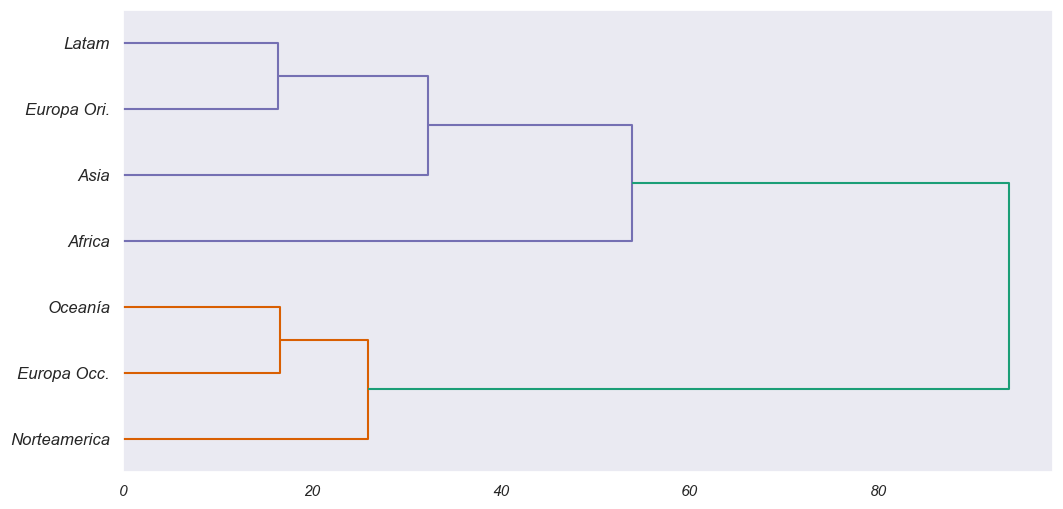

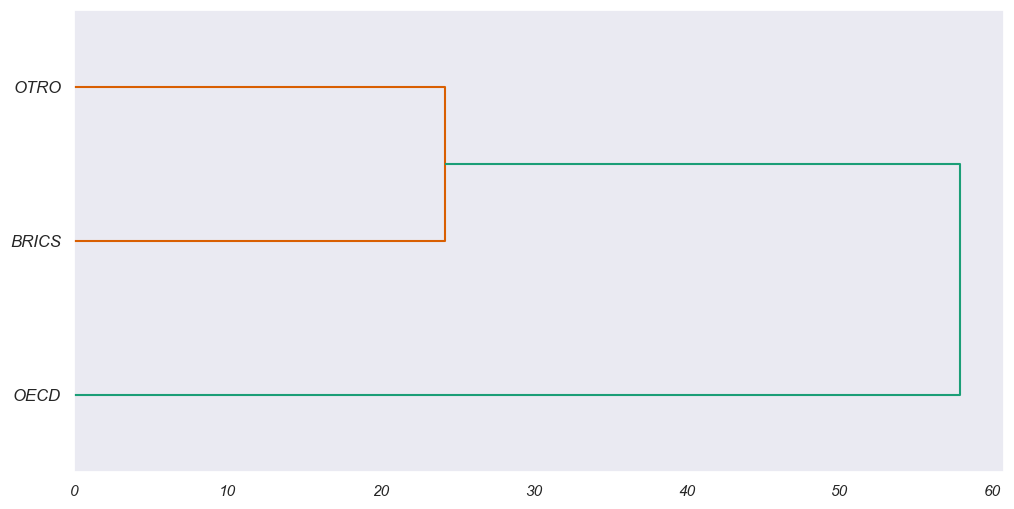

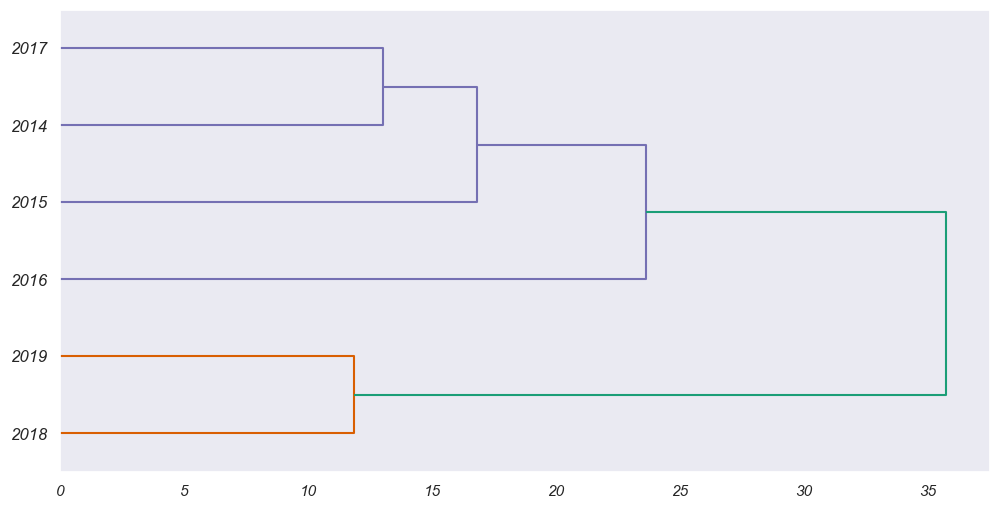

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

for col in ["BLOCK","ORG","AÑO"]:
  aux = data_indicadores.pivot_table(index=col,columns="PILAR",values="VALOR_INDICE_NORM")
  aux = aux.dropna()
  row_clusters = linkage(aux.values, method="complete",metric="euclidean")
  fig,ax = pl.subplots(figsize=(12,6))
  row_denr = dendrogram(row_clusters,labels=aux.index.tolist(),orientation="right",ax=ax)
  # Coefficiente de correlación cophenetico: mide que tan bueno es el agrupado
  c, coph_dists = cophenet(row_clusters, pdist(aux.values))
  print(f"Coeficiente Cophenético para {col}:", np.round(c,2))
  savefig(fig,f"agrupamiento_jerarquico_{col.lower()}")


# agregar heatmap al de los paises

#aux = data_indicadores.pivot_table(index="AÑO",columns="PILAR",values="VALOR_INDICE_NORM")
#aux = data_indicadores.pivot_table(index="DESCRIPCION_INDX_NORM",columns="PAIS_COD",values="VALOR_INDICE_NORM")
#aux = data_indicadores.pivot_table(index="PAIS_COD",columns="PILAR",values="VALOR_INDICE_NORM")
#aux = aux.dropna()
#
#aux = data_pivoted.dropna()
#row_clusters = linkage(aux.values, method="complete",metric="euclidean")

#df_rowcluster = pd.DataFrame(row_clusters,columns=["Cluster1","Cluster2","Distance","Samples"])
#display(df_rowcluster)


#fig,ax = pl.subplots(figsize=(20,10))
#row_denr = dendrogram(row_clusters,labels=aux.index.tolist(),orientation="right",ax=ax)
#savefig(fig,"agrupamiento_jerarquico")


Coeficiente Cophenético: 0.76
Figura guardada en: ./1. Escrito Tesis/figuras/agrup_pais_mapacalor.png
[1 2 2 2 5 5 2 1 3 3 5 3 1 1 4 3 2 1 2 1 4 5 5 5 2 4 2 2 5 5 1 5 3 5 5 1 5
 5 4 1 2 2 5 3 1 5 3 4 5 5 1 5 1 4 5 4]
Figura guardada en: ./1. Escrito Tesis/figuras/agrupamiento_jerarquico_pca.png


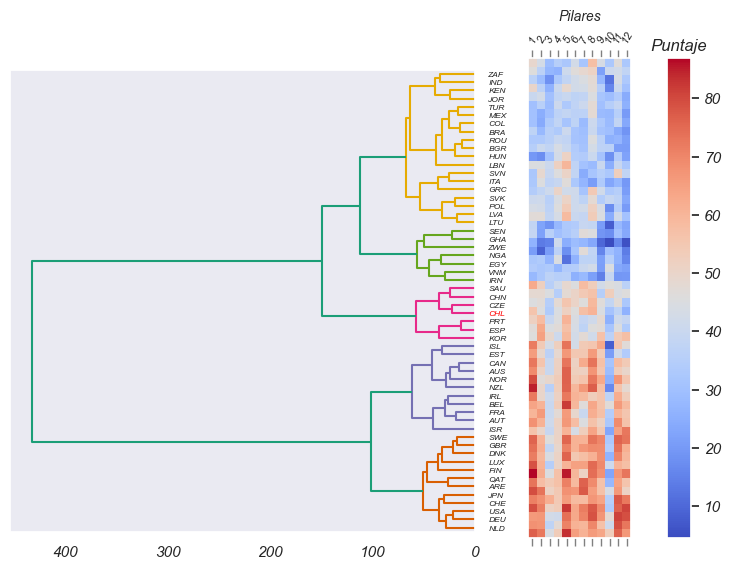

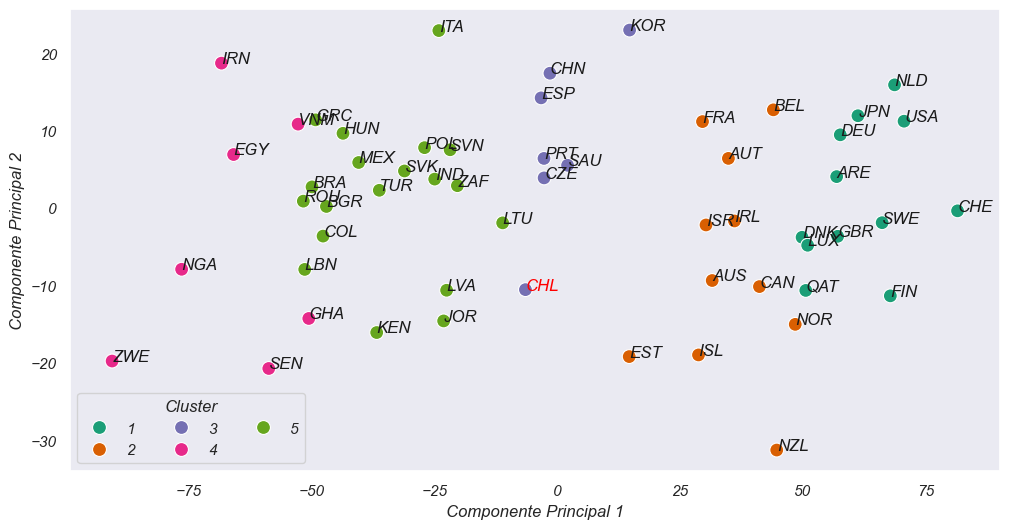

In [91]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist
import matplotlib.ticker as ticker

colors = sns.color_palette("Dark2")


col = "PAIS_COD"
aux = data_indicadores.pivot_table(index=col,columns="PILAR",values="VALOR_INDICE_NORM")
aux = aux.dropna()

# Agrupado por jerarquía: criterio de enlace: ward y distnacia euclidiean
row_clusters = linkage(aux.values, method="ward",metric="euclidean")


# Coefficiente de correlación cophenetico: mide que tan bueno es el agrupado
c, coph_dists = cophenet(row_clusters, pdist(aux.values))
print("Coeficiente Cophenético:", np.round(c,2))

# Figura dendograma
fig,ax = pl.subplots(figsize=(6,6))
row_denr = dendrogram(row_clusters,labels=aux.index.tolist(),orientation="left",ax=ax,color_threshold=70)

# resalto de chile
ticks_y = ax.get_yticklabels()
for tick in ticks_y:
  if tick.get_text()=="CHL":
    tick.set_color('red')
    tick.set_fontweight('bold')

df_rowdnr = aux.iloc[row_denr["leaves"][::-1]]
#ax.set_xticks([])

axm = fig.add_axes([0.2,0.1, 1.2,0.8])
cax = axm.matshow(df_rowdnr,interpolation="nearest",cmap="coolwarm")

fig.colorbar(cax,ax=axm)
axm.set_yticks([])
axm.tick_params(axis='both', which='major', labelsize=8, width=1,color='gray')
axm.xaxis.set_major_locator(ticker.FixedLocator(list(range(0,12))))
axm.set_xticklabels(list(range(1,13)),rotation=60)
axm.set_title("Pilares",fontdict={'fontsize':10})
fig.text(1.24,0.92, 'Puntaje', ha='center', va='center')

savefig(fig,"agrup_pais_mapacalor")


from scipy.cluster.hierarchy import fcluster
# a partir de la distancia de la gráfica, se seleccionan los grupos
max_distance = 70
clusters = fcluster(row_clusters, max_distance, criterion='distance')

# Print the cluster assignments
print(clusters)
len(clusters)

# Ploteo: reducción de dimensionalidad
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(aux)
explained_variance = pca.explained_variance_ratio_
explained_variance

aux_to_plot = pd.DataFrame(pca_result,columns=["PC1","PC2"])
aux_to_plot["cluster"] = clusters
aux_to_plot.index = aux.index.tolist()

fig,ax = pl.subplots(figsize=(12,6))
sns.scatterplot(data=aux_to_plot,x="PC1",y="PC2",s=100,hue="cluster",ax=ax,palette="Dark2")
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.legend(ncols=3,title="Cluster",loc="best")

for row,col in aux_to_plot.iterrows():
  c = "k"
  if row=="CHL":c="red"
  ax.text(col["PC1"],col["PC2"],row,color=c)

savefig(fig,"agrupamiento_jerarquico_pca")
